<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-On Lab: Implementing a Simple Feedforward Neural Network on the Iris Dataset

Estimated time needed: **60** minutes

## Overview:

In this hands-on lab, you will build a simple feedforward neural network to classify flowers in the Iris dataset into three categories: **Setosa**, **Versicolor**, and **Virginica**. The lab involves using Python libraries such as Keras, TensorFlow, and Scikit-learn for data preprocessing, model creation, training, and evaluation. 

You will explore how different optimization algorithms SGD, Momentum, and Adam impact the convergence rate and overall model performance. This lab is designed to provide practical experience with deep learning concepts and expose learners to essential machine learning workflows.


## Objectives
By the end of this lab, learners will be able to:
1. Load and preprocess the Iris dataset, including feature scaling and target one-hot encoding.
2. Implement a feedforward neural network using Keras or TensorFlow.
3. Train and evaluate the neural network using different optimization algorithms:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam Optimizer
4. Visualize and compare the performance of each optimizer using metrics like accuracy, precision, recall, and the confusion matrix.
5. Understand the importance of preprocessing, network design, and hyperparameter tuning in building effective models.


## Dataset Used

**Iris Dataset**:  
The Iris dataset is a widely used toy dataset for classification tasks. It contains 150 samples of iris flowers with the following characteristics:  
- **Features (4)**: Sepal length, Sepal width, Petal length, Petal width.  
- **Target Classes (3)**:  
  - *Setosa* (label 0)  
  - *Versicolor* (label 1)  
  - *Virginica* (label 2)  

Each sample belongs to one of these three categories. The dataset is simple and well-separated, making it ideal for experimenting with basic machine learning and neural networks.

## Implementation: 

### Step 1: Install and Import Necessary Libraries

> **Note**: Please be patient while the required packages are being installed. This may take some time due to the multiple dependencies, but it should complete shortly.

In [1]:
# Install all necessary libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 137.6 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


### Step 2: Load and Explore the Dataset

**Explanation**: This code loads the Iris dataset and creates a DataFrame for easier analysis. The pairplot helps visualize relationships between features and classes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2   

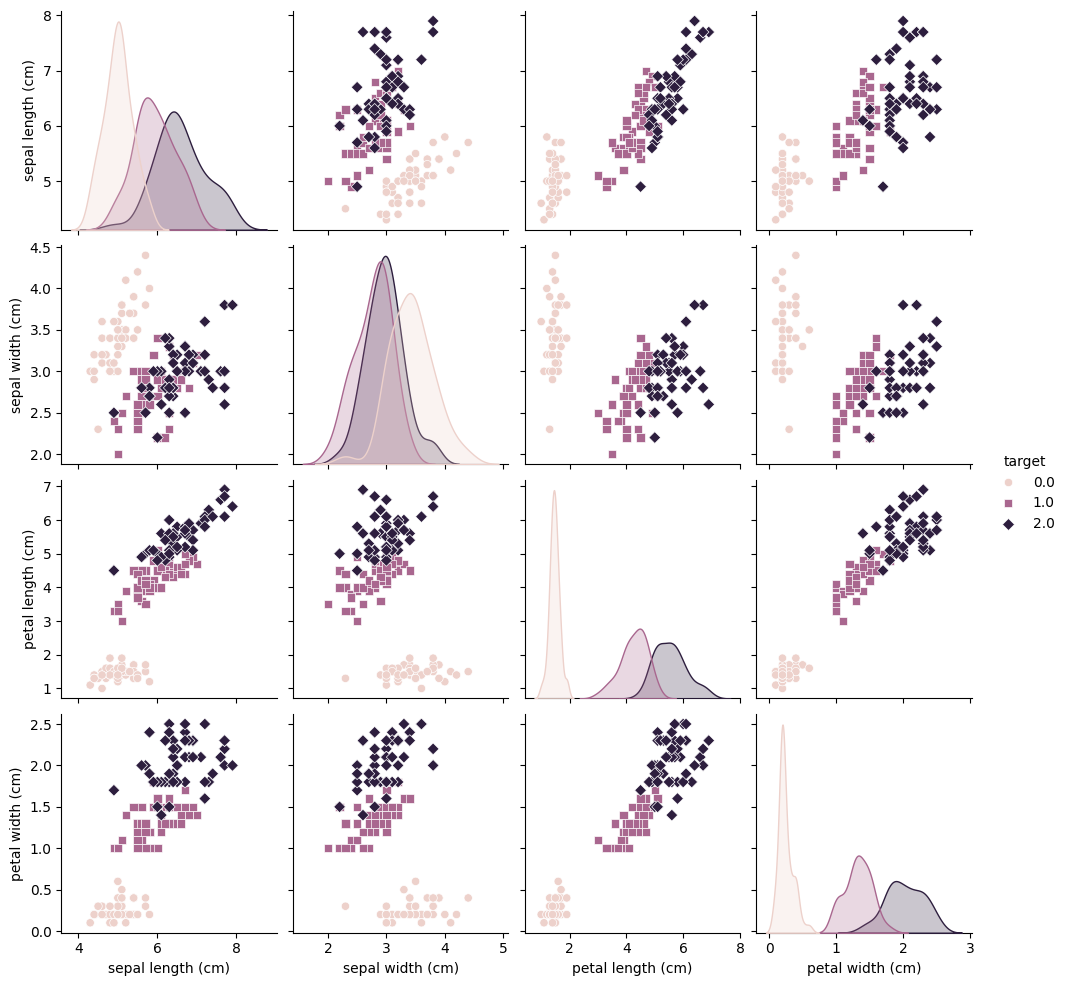

In [3]:
# Load dataset
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])
# np.c_ is a NumPy shortcut used for column-wise concatenation of arrays.
# np.c_[iris['data'], iris['target']]:
# combines the feature matrix iris['data'] (shape 150×4) with the target vector iris['target'] (shape 150×1) 
# into a single 150×5 matrix.
# This line creates a Pandas DataFrame called 'data' by combining the features and the target into one table.
# columns=iris['feature_names'] + ['target'] --> This sets the column names
# iris['feature_names'] is:
# ['sepal length (cm)', 'sepal width (cm)',
# 'petal length (cm)', 'petal width (cm)']
# Add ['target'] to get 5 total column names.



# Display dataset information
print(data.info())  # Shows data types and null values
print(data.head())  # Displays the first 5 rows of the dataset

# Visualize pairplot
sns.pairplot(data, hue='target', diag_kind='kde', markers=["o", "s", "D"])
plt.show()  # Pairwise plots of features with species color-coded
# kde stands for Kernel Density Estimation.
# In sns.pairplot(), diag_kind='kde' means that the diagonal plots 
# (i.e., distributions of individual features) should be shown as smooth curves instead of histograms.
# 'kde': smooth density plots
# 'hist': regular histograms
# markers=["o", "s", "D"]
# This controls marker styles for different classes in the scatterplots of the pairplot.
# "o" = circle marker (for one class)
# "s" = square marker
# "D" = diamond marker
# So in our pairplot, each class (Setosa, Versicolor, Virginica) will get a different marker symbol in the scatterplots.
# hue = 'target' means the 3 species (Setosa, Versicolor, Virginica) will each be assigned a different color in the plot.



<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Display dataset information
print(data.info())  # Shows data types and null values
print(data.head())  # Displays the first 5 rows of the dataset

# Visualize pairplot
sns.pairplot(data, hue='target', diag_kind='kde', markers=["o", "s", "D"])
plt.show()  # Pairwise plots of features with species color-coded

```
</details>

### Step 3:  Preprocess the Data

**Explanation**: The data is split into training and testing sets. The target is converted to one-hot encoding (e.g., [1, 0, 0] for Setosa). Features are standardized for better model performance.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Features and target
X = iris['data']  # Feature matrix (sepal and petal measurements)
y = iris['target'].reshape(-1, 1)  # Target values reshaped into column format
# Why reshape?
# OneHotEncoder expects a 2D input. A 1D array would cause an error.

# One-hot encode target
# What is One-Hot Encoding (aka One-Hot Format)?
# One-hot encoding is a way to represent categorical (non-numeric) data as numbers, especially for use in ML models.
# Turn each category/class into a binary vector where:
# Only one element is 1 (hot),
# the rest are 0 (cold).
# Label	Class
# 0	Setosa
# 1	Versicolor
# 2	Virginica
# Using one-hot encoding, these become:
# Class	One-Hot Vector
# Setosa	[1, 0, 0]
# Versicolor	[0, 1, 0]
# Virginica	[0, 0, 1]
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
y_encoded = encoder.fit_transform(y)  # Convert target to one-hot encoding
# This line^ tells the encoder to:
# Learn the possible categories (0, 1, 2)
# Transform each label into a one-hot vector

# Why Use One-Hot Encoding?
# Machine learning models (especially neural networks) can’t understand strings or raw class numbers directly:
# If we use 0, 1, 2 directly, the model might think class 2 is greater than class 0, which isn’t true.
# One-hot removes any implied order or ranking.

# encoder = OneHotEncoder(sparse_output=False) --> Creates an instance of the encoder.
# sparse_output=False means the output will be a regular NumPy array, 
# not a sparse matrix (which saves memory but is harder to work with).


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# X: The feature matrix (flower measurements: sepal length, petal width, etc.)
# y_encoded: The one-hot encoded target labels (e.g., [1,0,0] for Setosa)
# test_size=0.2: 20% of the data goes to the test set, 80% to training
# random_state=42: Controls the random shuffling of the data before splitting — ensures reproducibility
# X_train: Features for training (80%)
# X_test: Features for testing (20%)
# y_train: One-hot targets for training
# y_test: One-hot targets for testing

# Assuming there's 150 samples:
# X_train: (120, 4) --> 80% of the samples (features) for training
# X_test: (30, 4) --> 20% of the samples (features) for testing
# y_train: (120, 3) --> 80% of the labels (one-hot encoded)
# y_test: (30, 3) --> 20% of the labels (one-hot encoded)

# For X_train and X_test, '4' comes from the 4 features in the Iris dataset:
# The Iris dataset has 4 feature columns: Sepal length, Sepal width, Petal length, Petal width

# For y_train and y_test, '3' comes from the number of classes/species:
# The Iris dataset has 3 unique flower classes: Setosa (class 0), Versicolor (class 1), Virginica (class 2)
# When we apply one-hot encoding, each label is converted into a vector of length 3

# Normalize features
# We want to perform a standard scaling on the petal features. 
# Transforms the petal features measurements to a range of numbers with mean = 0 and standard deviation = 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize features for stability
X_test = scaler.transform(X_test)

# scaler = StandardScaler() --> Creates a StandardScaler object from sklearn.preprocessing.
# This object, 'scaler', is ready to standardize the features — meaning:
# Standardized value=(𝑥−mean)/standard deviation

# X_train = scaler.fit_transform(X_train)
# What it does:
# Fits the scaler only on X_train:
# It computes the mean and standard deviation for each feature in the training data.
# Then it transforms the training data:
# Subtracts the mean and divides by the std dev for each feature → all features now have mean 0 and std dev 1.
# This is called z-score normalization.
# Important: We fit only on X_train to avoid data leakage — we don’t want the test data to influence model training.

# X_test = scaler.transform(X_test)
# What it does:
# Uses the same mean and std (from training data) to scale the test data.
# Ensures that both train and test features are on the same scale, based on training stats.
# Many ML models (like logistic regression, neural networks) work much better when input features are on the same scale.
# Note: Never call fit_transform() on X_test — that would be cheating by using test info during training.

# The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
# The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
# The fit_transform() method does both fits and transform.

# The fit() function computes the formulation to transform the column based on Standard scaling,
# but doesn’t apply the actual transformation. 
# The computation is stored as a fit object. The fit method doesn’t return anything.

# The transform() method takes advantage of the fit object in the fit() method and 
# applies the actual transformation onto the column. 
# So, fit() and transform() is a two-step process that completes the transformation in the second step. 
# Here, unlike the fit() method, the transform() method returns the actually transformed array.


# The fit_transform() Method:
# fit() and transform() is a two-step process, which can be brought down to a one-shot process using the fit_transform() method
# When the fit_transform() method is used, we can compute and apply the transformation in a single step.


# scaler.fit_transform(X_train)
# - Fits on X_train: computes mean and standard deviation of each feature
# - Then transforms X_train: subtracts mean and divides by std (standardization)

# scaler.transform(X_test)
# - Does NOT fit again (no new statistics calculated)
# - Uses the same mean and std from X_train to transform X_test
# - Ensures test data is treated consistently (no data leakage)

# Why the distinction matters:
# fit()/fit_transform() should only be used on training data
# transform() should be used on test or new data, using the ALREADY LEARNED parameters

# so what even stores these 'already learned parameters' from X_train to be reused in X_test?:
# The scaler object stores the learned statistics (like mean and standard deviation for each feature) inside itself.
# Internally Stored:
# After .fit_transform(X_train), the scaler object contains:
# scaler.mean_: an array of means for each feature in X_train
# scaler.scale_: the standard deviations of each feature
# scaler.var_: the variances (if needed)
# So when we later call:
# X_test = scaler.transform(X_test)
# It uses these stored values (from training data) to standardize X_test.
# 'scaler' object remembers the statistics from the .fit_transform() step and reuses them during .transform(). 
# This ensures consistency and avoids data leakage.



<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)  # Use 'sparse_output' instead of 'sparse'
y_encoded = encoder.fit_transform(y)  # Convert target to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Standardize features for stability
X_test = scaler.transform(X_test)
    
```
</details>

### Step 4: Design the Feedforward Neural Network

**Explanation**: The network has two hidden layers with ReLU activation and one output layer with softmax activation to predict probabilities for the three classes.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
        Dense(8, activation='relu'),  # 2nd hidden layer
        Dense(3, activation='softmax')  # Output layer with 3 classes
    ])
    return model

#We're using Keras' Sequential API here, which stacks layers one after the other.
# 1. Input Layer + First Hidden Layer:
# Dense(10, activation='relu', input_shape=(X_train.shape[1],))
# - A Dense (fully connected) layer with 10 neurons
# - ReLU activation (introduces non-linearity)
# - input_shape=(X_train.shape[1],) means the input layer expects a vector with the same number of features as our training data

# 2. Second Hidden Layer:
# Dense(8, activation='relu')
# - Another dense layer with 8 neurons and ReLU activation
# - Learns more abstract patterns

# 3. Output Layer:
# Dense(3, activation='softmax')
# - Final layer with 3 neurons (because the Iris dataset has 3 classes)
# - Softmax activation outputs probabilities for each class (they sum to 1)

# Return the Model:
# return model

# Calling create_model() will give us a new neural network that looks like this:
# Input (4 features) → Dense(10, ReLU) → Dense(8, ReLU) → Dense(3, Softmax)

# What is the '1' in X_train.shape[1]?
# In NumPy or Pandas, .shape gives the dimensions (rows and columns) of an array or DataFrame:
# X_train.shape: For example, might return (120, 4)
# This means:
# - 120 = number of training samples (rows)
# - 4 = number of features (columns), like sepal length, sepal width, etc.
# So, X_train.shape[1] means:
# "Give me the number of features (columns) in X_train" --> index 1 is '4', the number of features
# This is needed because the first layer of the neural network must know how many inputs it will receive, which is the num. of features

# .shape returns a tuple → e.g., (120, 4)
# Index 0 is number of samples
# Index 1 is number of features


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python

# Define model
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
        Dense(8, activation='relu'),  # 2nd hidden layer
        Dense(3, activation='softmax')  # Output layer with 3 classes
    ])
    return model
    
```
</details>

### Step 5: Train the Model with Different Optimization Algorithms

**Explanation**: The model is trained using different optimizers: SGD (basic gradient descent), Momentum (adds velocity), and Adam (adaptive learning rates). Training history is logged for each optimizer.

In [7]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import History

# SGD: Stochastic Gradient Descent
# Adam: Adaptive Moment Estimation

# Train model with different optimizers
optimizers = {'SGD': SGD(learning_rate=0.01), 
              'Momentum': SGD(learning_rate=0.01, momentum=0.9), 
              'Adam': Adam(learning_rate=0.01)} #dictionary of optimisers 

histories = {}

# 'SGD': SGD(learning_rate=0.01)
# SGD (Stochastic Gradient Descent) updates weights using small batches of data.
#learning_rate=0.01 means the model updates weights in small steps (0.01 of the gradient value).
# Why 0.01? It’s a commonly used starting value that balances:
# - Learning fast enough
# - Avoiding overshooting the optimal point

# 'Momentum': SGD(learning_rate=0.01, momentum=0.9)
# Momentum helps SGD move faster through shallow or noisy regions by adding a fraction of the previous update.
# momentum=0.9 means: 90% of the previous step’s direction is carried into the current one.
# Why 0.9? Empirically, values like 0.9 or 0.99 usually help models converge more quickly and avoid getting stuck.

# 'Adam': Adam(learning_rate=0.01)
# Adam combines Momentum + Adaptive Learning Rate.
# learning_rate=0.01 is used here for comparison with SGD, but Adam usually works better with smaller rates like 0.001 or even 0.0001.

# Loop through each optimizer, train the model, evaluate its performance, and store the training history for comparison.
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8, verbose=0)  # Train
    histories[opt_name] = history.history  # Store training history
    print(f"Final Test Accuracy with {opt_name}: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")

# compile() is a built-in method from Keras' Sequential class
# It prepares the model for training by setting:
# - the optimizer (how the model learns)
# - the loss function (how error is measured)
# - the metrics (how performance is evaluated

#categorical_crossentropy is a loss function used for multi-class classification when our target (label) is one-hot encoded.
# Example:
# True label (Setosa): [1, 0, 0]
# Model prediction: [0.7, 0.2, 0.1] -> The output layer uses Softmax activation, which outputs probabilities for each class (they sum to 1)
# The function computes how "wrong" the prediction is based on the difference between the predicted probabilities and the true one-hot vector.


# 'accuracy' is also a built-in metric in Keras.
# It tells the model to report accuracy during training and validation:
# i.e., “How often was the predicted class correct?”
# Other available metrics include:
# - 'mae' (mean absolute error)
# - 'mse' (mean squared error)
# - 'precision', 'recall' etc. 


# history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8, verbose=0):
# - X_train, y_train: training data
# - validation_data=(X_test, y_test): evaluates on test data during training
# - epochs=50: trains for 50 full passes through the data
# - batch_size=8: processes 8 samples at a time
# - verbose=0: hides output to keep things clean

# model.evaluate(X_test, y_test, verbose=0)[1]
# [1] gets the accuracy value (since evaluate() returns [loss, accuracy])







Training with SGD optimizer...
Final Test Accuracy with SGD: 1.0000

Training with Momentum optimizer...
Final Test Accuracy with Momentum: 1.0000

Training with Adam optimizer...
Final Test Accuracy with Adam: 0.9667


<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Loop through each optimizer, train the model, evaluate its performance, and store the training history for comparison.
    
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Compile model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=8, verbose=0)  # Train
    histories[opt_name] = history.history  # Store training history
    print(f"Final Test Accuracy with {opt_name}: {model.evaluate(X_test, y_test, verbose=0)[1]:.4f}")
    
```
</details>

### Step 6: Visualize and Compare Convergence Rates

**Explanation**: Loss and accuracy curves are plotted for each optimizer, showing how fast they converge and their final performance.

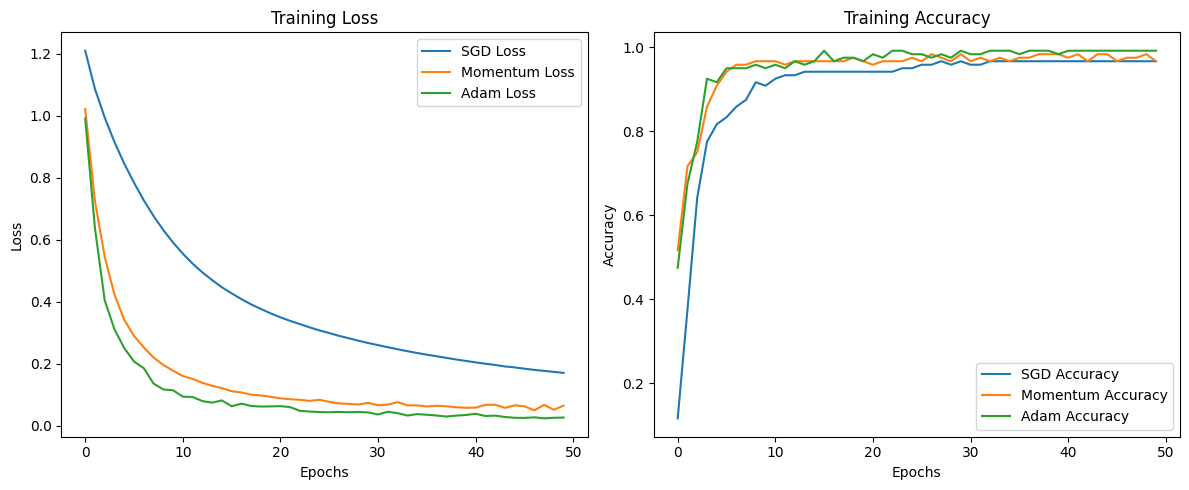

In [8]:
# Plot loss and accuracy for each optimizer
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history['loss'], label=f'{opt_name} Loss')  # Plot loss over epochs
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{opt_name} Accuracy')  # Plot accuracy over epochs
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# plt.subplot(1, 2, 1)
# 1 = number of rows in the grid
# 2 = number of columns in the grid
# 1 = this plot is in position 1 (i.e., the left plot)
# So this creates a 1-row, 2-column layout, and this plot appears in the left panel.

# plt.subplot(1, 2, 2)
# Same grid: 1 row × 2 columns
# Plot is now in position 2 (i.e., the right panel)

# We’re making:
# Plot 1: Training Loss (left)
# Plot 2: Training Accuracy (right)
# And arranging them side by side (1 row, 2 columns).




<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Loss
plt.subplot(1, 2, 1)
for opt_name, history in histories.items():
    plt.plot(history['loss'], label=f'{opt_name} Loss')  # Plot loss over epochs
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
for opt_name, history in histories.items():
    plt.plot(history['accuracy'], label=f'{opt_name} Accuracy')  # Plot accuracy over epochs
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
    
```
</details>

### Step 7: Evaluate the Final Model Performance

**Explanation**: The best model (using Adam) is evaluated on the test set. A classification report provides precision, recall, and F1 scores, while a confusion matrix shows how well the model distinguishes between classes.

1/1 [==============================] - 0s 65ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



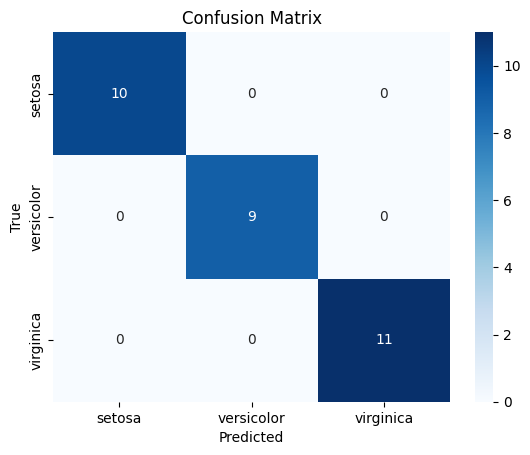

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the best model (e.g., Adam optimizer used for demonstration)
best_model = create_model()
best_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
best_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)  # Retrain with Adam
y_pred = np.argmax(best_model.predict(X_test), axis=1)  # Predicted classes
y_true = np.argmax(y_test, axis=1)  # True classes

# predict() is a built-in method in Keras models.
# It returns the model’s output (probability scores in this case) for each input in X_test.
# Since our model ends with Dense(3, activation='softmax'), each prediction will look like:
# [0.1, 0.7, 0.2] -> Probability of classes 0, 1, and 2

# np.argmax:
# predictions = np.array([
#    [0.1, 0.7, 0.2],  # model thinks class 1 is most likely (since 0.7 is the max value, and that's at index 1)
#    [0.9, 0.05, 0.05],  # class 0 is most likely becaus 0.9 is the max. value and it's at index 0
#    [0.2, 0.2, 0.6]   # class 2 is most likley 
# ])
# To get the predicted class for each row, use:
# np.argmax(predictions, axis=1) ➜ array([1, 0, 2])

# Classification report
print(classification_report(y_true, y_pred, target_names=iris['target_names']))  # Detailed metrics

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# A confusion matrix is a table that helps us evaluate the performance of a classification model 
# by showing how often predictions match the true labels.
# cm = confusion_matrix(y_true, y_pred)
# confusion_matrix() from sklearn compares our true labels vs predicted labels

# sns.heatmap: Draws the matrix as a colored heatmap 
# - A heatmap is a graphical representation of data where values are represented by different colors. 
# - The idea is to quickly visualize patterns, trends, or intensity of values across a grid or matrix.
# - Typically, darker colors (or warmer colors) represent higher values, and lighter colors (or cooler colors) represent lower values.

# annot=True: Show the numbers in each cell
# - annot=True: This means annotate the heatmap with the actual numerical values in each cell of the grid.
# - If annot=False, the cells will just be filled with colors and no numbers will appear.

# fmt='d': Format numbers as integers

# cmap='Blues': Use a blue color scale
# - cmap='Blues': The cmap parameter specifies the color map or color palette to use for the heatmap.
# - 'Blues' is a predefined color palette in Seaborn, which shades cells from light blue (low) to dark blue (high).

# xticklabels / yticklabels: Label the axes with actual class names (Setosa, etc.)

# High values on the diagonal = good accuracy
# High values off-diagonal = model made mistakes
# This helps us see exactly which classes are being confused with each other.



<details>
    <summary>Click here to view/hide the solution.</summary>
    
```python
    
# Classification report
print(classification_report(y_true, y_pred, target_names=iris['target_names']))  # Detailed metrics

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
    
```
</details>

The results and confusion matrix you provided for **7. Evaluate the Final Model Performance** indicate excellent performance, achieving 100% accuracy. Here's explanation of the Results:

---

### **Explanation of the Results:**

1. **Classification Report:**
   - **Precision**: Indicates the proportion of correct positive identifications. In this case, all predictions are 100% accurate for each class (Setosa, Versicolor, Virginica).  
   - **Recall**: Indicates the proportion of actual positives that are correctly identified. Again, all predictions are perfect for all classes.  
   - **F1-Score**: The harmonic mean of precision and recall, showing a balance between the two. Here, it's 1.00 for all classes, meaning the model has perfect classification performance.  
   - **Support**: The number of actual instances for each class in the test set. The model evaluated 10 Setosa, 9 Versicolor, and 11 Virginica samples.

2. **Confusion Matrix:**
   - The matrix shows **no misclassifications**, as all samples are correctly predicted. Each diagonal entry represents correctly classified samples, while the off-diagonal entries (which are zero) represent errors.
   - For example:
     - 10 Setosa samples are correctly classified as Setosa.
     - 9 Versicolor samples are correctly classified as Versicolor.
     - 11 Virginica samples are correctly classified as Virginica.

3. **Why 100% Accuracy?**
   - **Dataset Simplicity**: The Iris dataset is small and well-separated in feature space, making it easier for even simple models to achieve perfect classification.  
   - **Preprocessing**: Proper scaling of features and one-hot encoding of the target helped optimize the training process.  
   - **Neural Network Architecture**: A well-chosen architecture with two hidden layers was sufficient for this dataset.  
   - **Adam Optimizer**: Adaptive optimization likely played a role in fine-tuning weights effectively.

---

### **You Should Understand:**
- **Model Performance:** Achieving 100% accuracy is possible on smaller, clean datasets but unlikely for more complex, real-world datasets.  
- **Importance of Preprocessing:** Proper preprocessing ensures the model receives data in a form that facilitates learning.  
- **Confusion Matrix:** Always verify the distribution of predictions to ensure the model performs well across all classes, not just on accuracy alone.  
- **Limitations:** While these results are impressive, real-world datasets often have noise, imbalance, and complexity that require more robust evaluation and regularization.

### Key Takeaways
- Different optimizers (SGD, Momentum, Adam) impact convergence and accuracy differently.
- Visualization of training progress aids in understanding model behavior.
- Adam typically outperforms other optimizers for stability and speed.

### Summary:

This lab walked you through implementing a neural network, comparing optimization techniques, and evaluating model performance. Understanding how optimizers influence training is essential for building robust machine learning models. It prepares you to tackle more complex datasets and develop an intuition for selecting the right optimizer and preprocessing techniques.